# Interest Rate Model 

## Model Definition
The model is defined as the following stochastic differential equation (SDE):
$$ dr_t = (\eta - \gamma r_t)dt + \sigma dW_t $$
- $ r_t $: short-term interest rate
- $ \eta $: long-term mean drift
- $ \gamma $: mean-reversion speed
- $ \sigma $: standard deviation
- $ W_t $: standard Brownian motion
This can also be written as:
$$ dr_t = -\gamma (r_t - \bar{r}) dt + \sigma dW_t, \quad \bar{r} = \frac{\eta}{\gamma} $$




## Economic Intuition
- When $ r_t > \bar{r} $: drift is negative → rate tends to fall
- When $ r_t < \bar{r} $: drift is positive → rate tends to rise
This mean-reverting nature makes it suitable for modeling interest rates that fluctuate around a stable long-term value.

## Discretization for Simulation

We use Euler–Maruyama method to discretize the SDE:

$$ r_{i+1} = r_i + (\eta - \gamma r_i)\Delta t + \sigma \phi_i \sqrt{\Delta t}, \quad \phi_i \sim \mathcal{N}(0, 1) $$

## Python Simulation

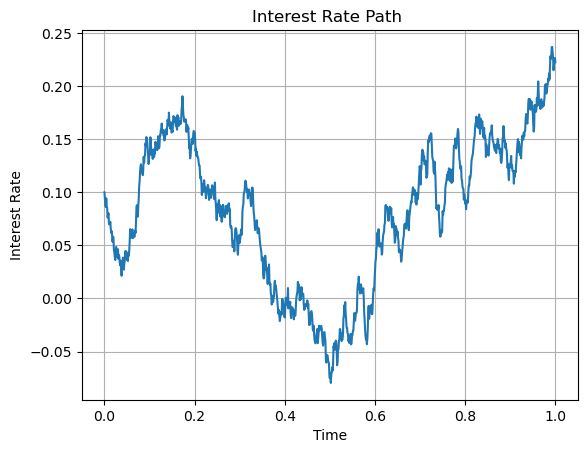

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
eta = 0.05        # long-term mean drift
gamma = 0.5      # speed of mean reversion
sigma = 0.2      # volatility
r0 = 0.1         # initial interest rate
T = 1.0           # total time
N = 1000          # number of time steps
dt = T / N

# Initialize rate array
rates = np.zeros(N + 1)
rates[0] = r0

# Simulate path
for i in range(N):
    phi = np.random.normal()
    rates[i+1] = rates[i] + (eta - gamma * rates[i]) * dt + sigma * phi * np.sqrt(dt)

# Plot result
time = np.linspace(0, T, N + 1)
plt.plot(time, rates)
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.title("Interest Rate Path ")
plt.grid(True)
plt.show()
